## Long-Only Time-Series Momentum Strategy

- Ranking Period: 6 months
- Holding Period: 6 months
- Rebalance technique: Volatility-weighted (Scale 40%)

$$r_{t,t+1}^{TSMOM, s} = (sign)r_{(t-3, t)}^{s}\frac{40\%}{\sigma_{t-1}}r_{(t, t+1)}^s$$


In [1]:
from zipline.finance.commission import PerDollar
%matplotlib inline
from datetime import datetime
import pytz
from trading_calendars import get_calendar
from zipline import run_algorithm
from strategies.ts_momentum import TSMomentum
import pandas as pd

def initialize(context):
    strategy = TSMomentum(ranking_period=6,
                          holding_period=6,
                          momentum_gap=1,
                          vol_scale=0.4,
                          vola_window=242,
                          buy_sell_strategy=1)
    strategy.initialize(context)
    context.strategy = strategy


def rebalance(context, data):
    context.strategy.rebalance(context, data)


def analyze(context, perf: pd.DataFrame) -> None:
    context.strategy.analyze(context, perf)

Initialized strategy TSMOM_L_6_6.pickle at 0.0 seconds


Start date,2012-01-03
End date,2018-12-28
Total months,83
,Backtest
Annual return,5.9%
Cumulative returns,48.6%
Annual volatility,6.9%
Sharpe ratio,0.86
Calmar ratio,0.35
Stability,0.79
Max drawdown,-17.0%


/Users/germanarutunov/opt/miniconda3/envs/strategies/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.98,2013-02-13,2014-03-14,2015-02-06,518
1,9.15,2017-02-03,2017-06-15,2018-01-25,255
2,5.59,2015-03-03,2015-03-27,2015-08-14,119
3,5.22,2018-10-03,2018-12-25,NaT,NaN
4,5.14,2012-03-15,2012-05-23,2013-01-18,222


Stress Events,mean,min,max
EZB IR Event,0.02%,-0.25%,0.47%
Apr14,-0.03%,-1.41%,0.93%
Oct14,0.05%,-0.77%,0.69%
Fall2015,-0.04%,-1.59%,0.98%
Recovery,0.01%,-0.94%,0.68%
New Normal,0.03%,-5.80%,1.97%


Top 10 long positions of all time,max
sid,
LSNGP,3.70%
PIKK,3.41%
SFIN,3.28%
RSTIP,2.96%
IRKT,2.90%
CBOM,2.80%
GMKN,2.71%
SNGS,2.65%
PRTK,2.58%


Top 10 short positions of all time,max
sid,
MRKY,-0.07%


Top 10 positions of all time,max
sid,
LSNGP,3.70%
PIKK,3.41%
SFIN,3.28%
RSTIP,2.96%
IRKT,2.90%
CBOM,2.80%
GMKN,2.71%
SNGS,2.65%
PRTK,2.58%


Finnished strategy TSMOM_L_6_6.pickle at 17.0 seconds


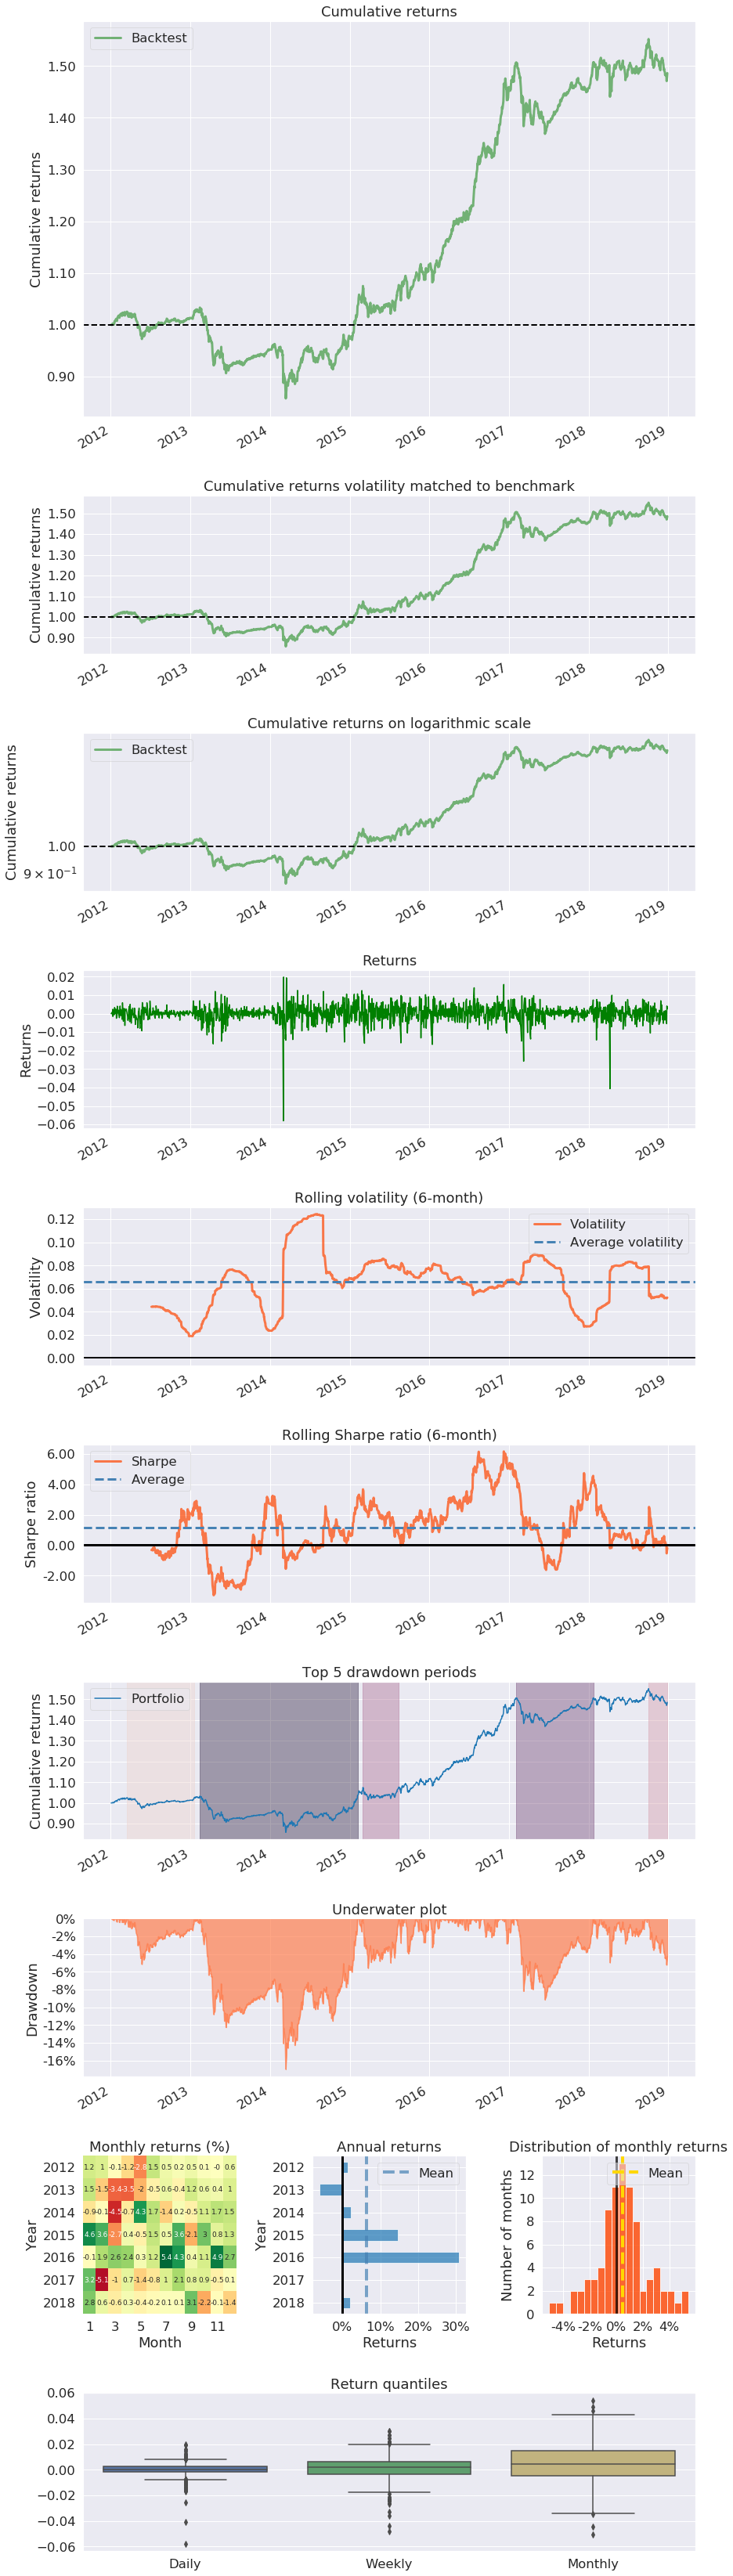

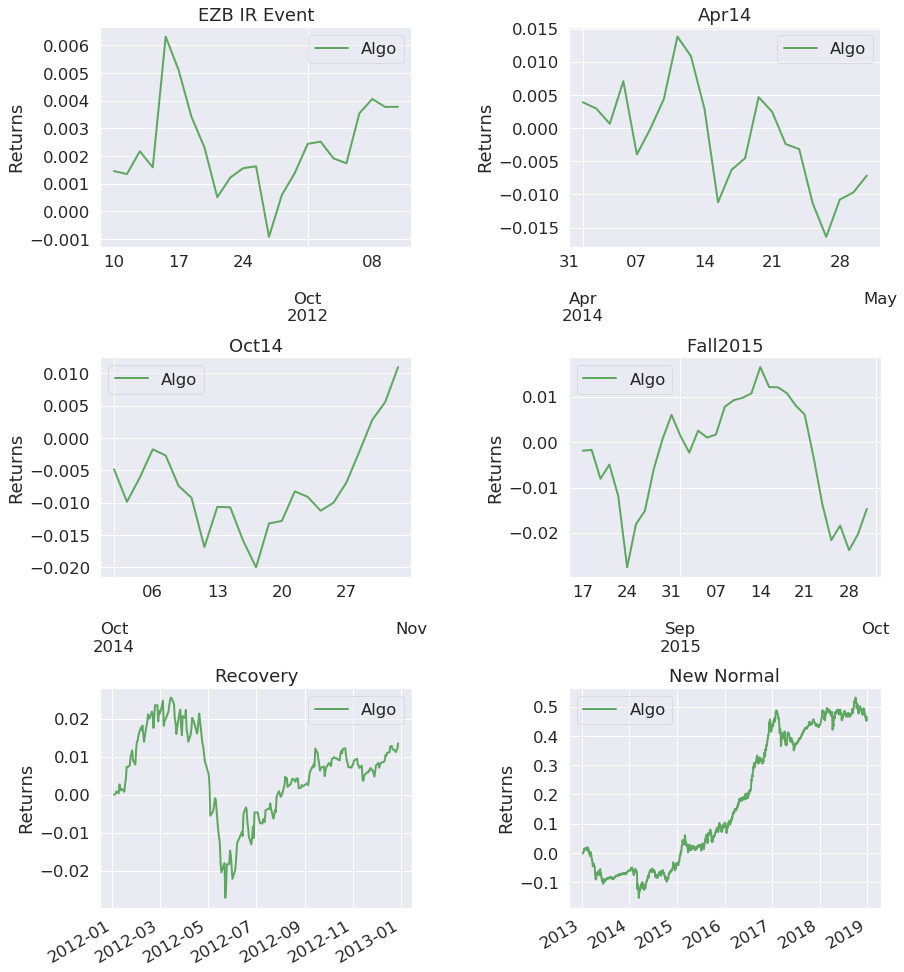

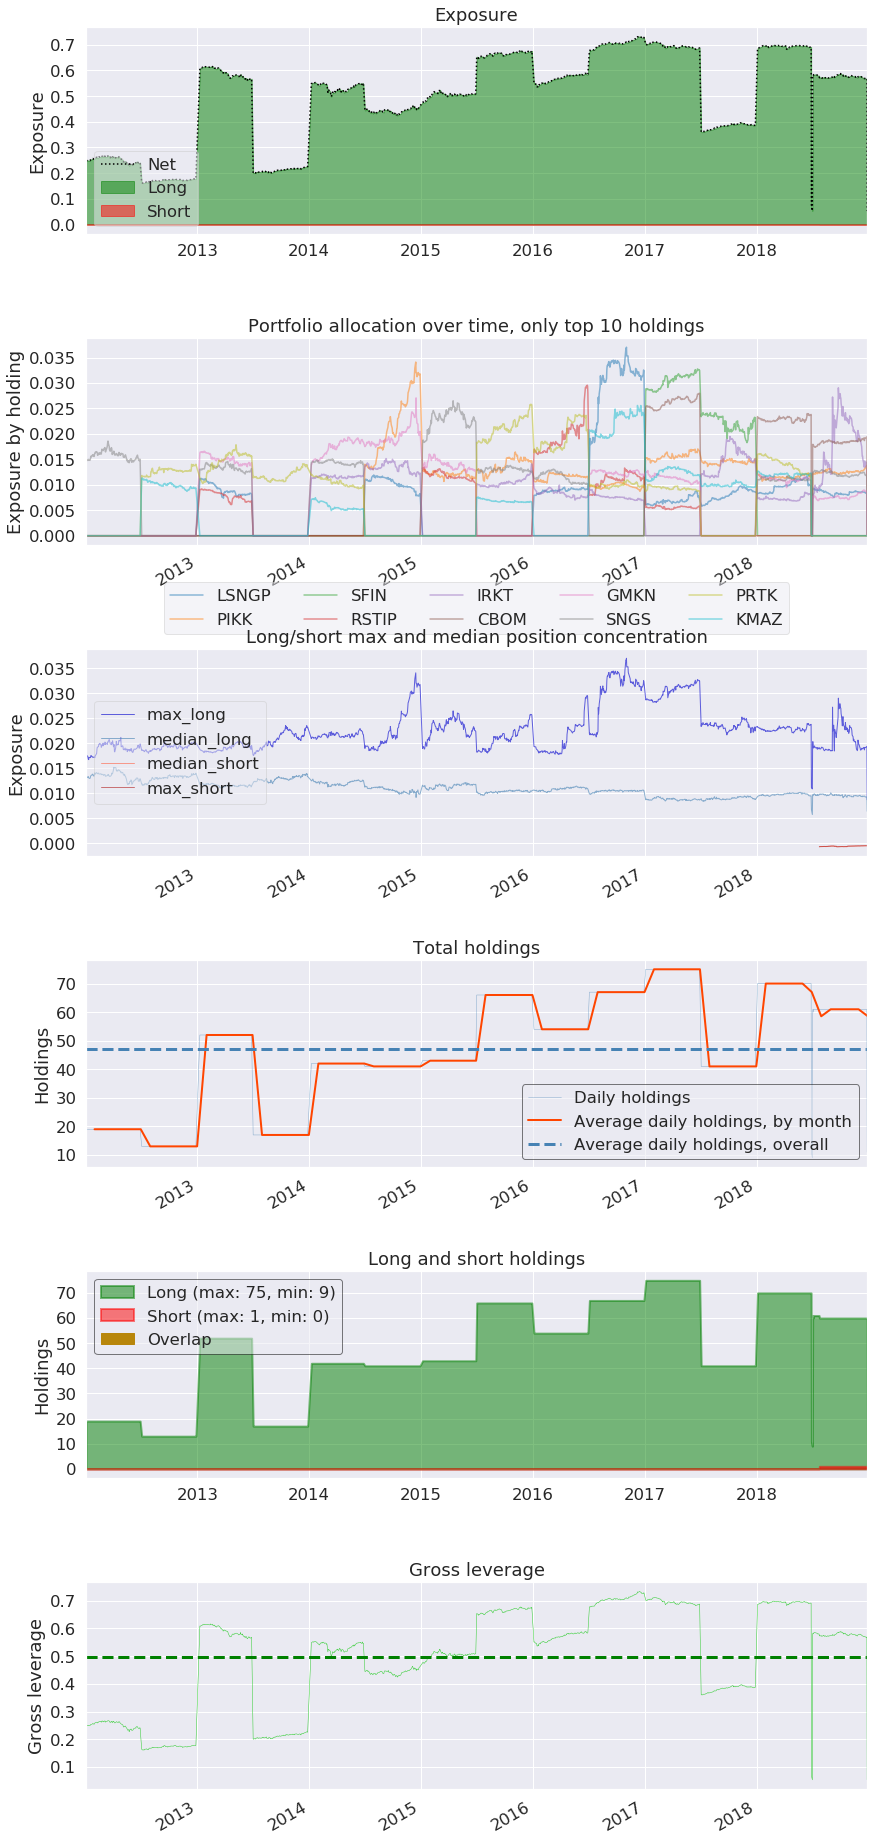

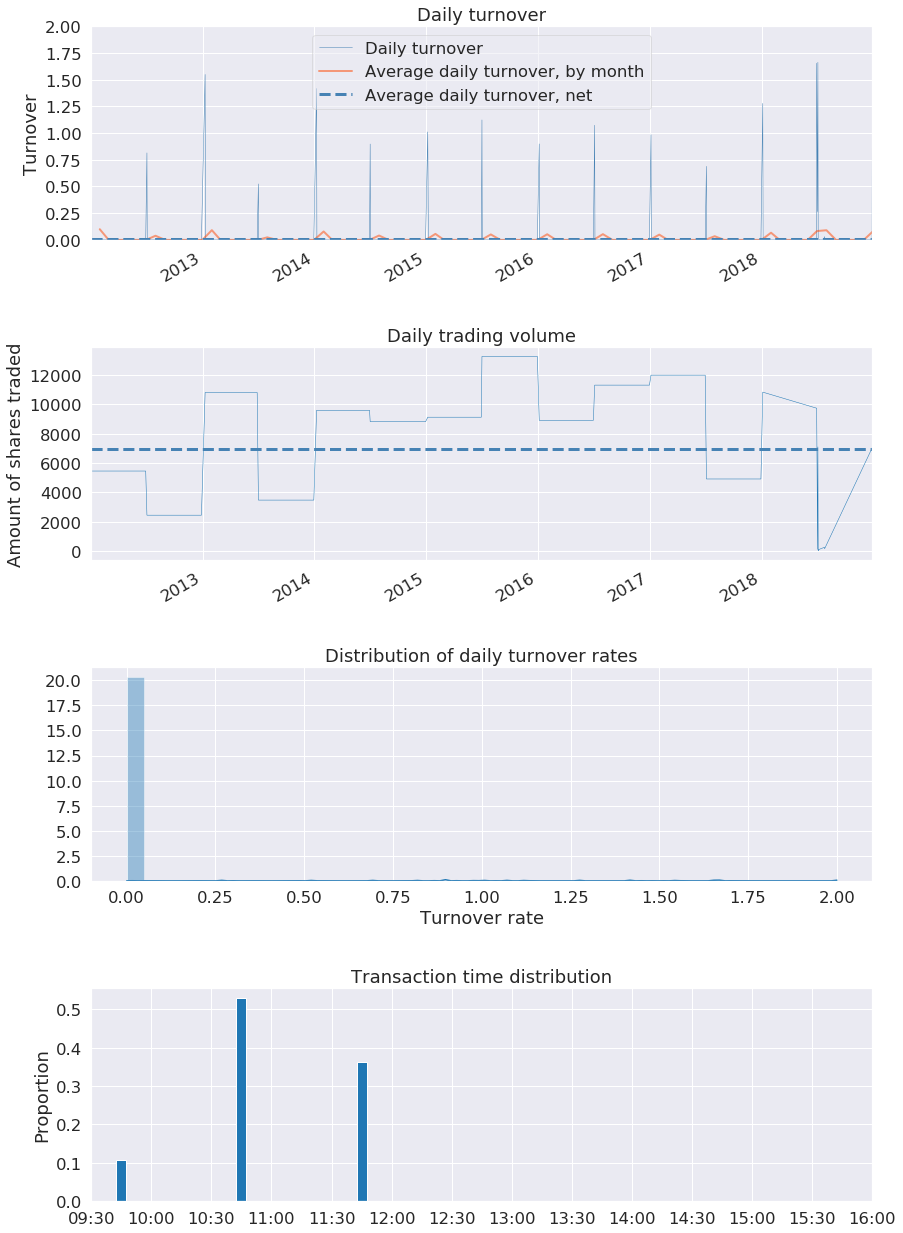

In [2]:
start = datetime(2012, 1, 3, 7, 0, 0, tzinfo=pytz.timezone('Europe/Moscow'))
end = datetime(2018, 12, 29, 7, 0, 0, tzinfo=pytz.timezone('Europe/Moscow'))
results = run_algorithm(
    start=start,
    end=end,
    initialize=initialize,
    capital_base=10000000,
    analyze=analyze,
    bundle='database_bundle2',
    trading_calendar=get_calendar('XMOS')
)


In [3]:
results.head()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2012-01-03 00:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.000,1000000.000,0.000,0.000,...,0.0,0.0,0,NaN,1000000.000,0.000,0.000,1,[],0.0
2012-01-04 00:00:00+00:00,0.001088,-0.000097,None,0.0,0.0,None,-252426.768,747573.232,252329.829,252329.829,...,0.0,0.0,0,-11.224972,1000000.000,0.000,0.000,2,"[{'amount': 164, 'sid': Equity(97 [RTKMP]), 'p...",0.0
2012-01-05 00:00:00+00:00,0.002714,0.000139,None,0.0,0.0,None,0.000,747573.232,252565.308,252565.308,...,0.0,0.0,0,13.100499,747573.232,252329.829,252329.829,3,[],0.0
2012-01-06 00:00:00+00:00,0.005050,0.000757,None,0.0,0.0,None,0.000,747573.232,253183.283,253183.283,...,0.0,0.0,0,61.937439,747573.232,252565.308,252565.308,4,[],0.0
2012-01-09 00:00:00+00:00,0.006611,0.000247,None,0.0,0.0,None,0.000,747573.232,252673.681,252673.681,...,0.0,0.0,0,3.386048,747573.232,253183.283,253183.283,5,[],0.0


In [6]:
import pyfolio as pf
import empyrical as em

In [7]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

In [8]:
returns.head()

2012-01-03 00:00:00+00:00    0.000000
2012-01-04 00:00:00+00:00   -0.000097
2012-01-05 00:00:00+00:00    0.000236
2012-01-06 00:00:00+00:00    0.000618
2012-01-09 00:00:00+00:00   -0.000509
Name: returns, dtype: float64

In [14]:
em.stability_of_timeseries(returns)


0.7777771439861744

In [16]:
monthly_rets = em.aggregate_returns(returns, 'monthly')

In [17]:
monthly_rets.mean()

0.004550320222930072

In [19]:
monthly_rets.tail()

2018  8     0.001801
      9     0.032066
      10   -0.022935
      11   -0.000783
      12   -0.014954
Name: returns, dtype: float64

In [21]:
monthly_rets.head()

2012  1    0.012083
      2    0.010187
      3   -0.001216
      4   -0.011871
      5   -0.028035
Name: returns, dtype: float64

In [23]:
monthly_rets.sort_values()

2017  2    -0.048705
2014  3    -0.043461
2013  4    -0.034775
      3    -0.033847
2012  5    -0.028035
2018  10   -0.022935
2015  3    -0.022109
      9    -0.019729
2013  5    -0.018928
2018  12   -0.014954
2014  7    -0.014576
2013  2    -0.012623
2017  5    -0.012398
2012  4    -0.011871
2014  1    -0.010445
2017  6    -0.009409
      3    -0.009229
2014  4    -0.008305
2013  6    -0.005588
2015  5    -0.005478
2018  3    -0.005258
      6    -0.005211
2014  9    -0.004678
2017  11   -0.004576
2013  8    -0.004500
2018  5    -0.002621
2014  2    -0.002025
2012  3    -0.001216
2018  11   -0.000783
      7    -0.000482
              ...   
2013  12    0.009986
2014  10    0.010061
2017  7     0.010122
2012  2     0.010187
2015  6     0.010237
2013  9     0.011876
2015  12    0.011888
2012  1     0.012083
2016  10    0.012555
      6     0.013718
2013  1     0.014447
2012  6     0.014775
2014  11    0.016601
      6     0.017551
2016  2     0.019529
2017  8     0.021067
2016  4     0

In [31]:
from pathlib import Path

outname = 'TSMOM_L_6_6.csv'
outdir = Path('../../data/out/TSMOM')
outdir.mkdir(parents=True, exist_ok=True)
results.to_csv(outdir / outname)

In [35]:
new_df = pd.read_csv(outdir / outname, parse_dates=[0], index_col=0)

In [36]:
new_df.head()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2012-01-03,NaN,0.000000,NaN,0.0,NaN,NaN,0.000,1000000.000,0.000,0.000,...,0.0,0.0,0,NaN,1000000.000,0.000,0.000,1,[],0.0
2012-01-04,0.001088,-0.000097,NaN,0.0,0.0,NaN,-252426.768,747573.232,252329.829,252329.829,...,0.0,0.0,0,-11.224972,1000000.000,0.000,0.000,2,"[{'amount': 164, 'sid': Equity(97 [RTKMP]), 'p...",0.0
2012-01-05,0.002714,0.000139,NaN,0.0,0.0,NaN,0.000,747573.232,252565.308,252565.308,...,0.0,0.0,0,13.100499,747573.232,252329.829,252329.829,3,[],0.0
2012-01-06,0.005050,0.000757,NaN,0.0,0.0,NaN,0.000,747573.232,253183.283,253183.283,...,0.0,0.0,0,61.937439,747573.232,252565.308,252565.308,4,[],0.0
2012-01-09,0.006611,0.000247,NaN,0.0,0.0,NaN,0.000,747573.232,252673.681,252673.681,...,0.0,0.0,0,3.386048,747573.232,253183.283,253183.283,5,[],0.0


In [37]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(new_df)

ValueError: DataFrame constructor not properly called!

In [38]:
new_df.positions

2012-01-03 00:00:00+00:00                                                   []
2012-01-04 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 97.04, 'co...
2012-01-05 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 98.0, 'cos...
2012-01-06 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 98.61, 'co...
2012-01-09 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 98.0, 'cos...
2012-01-10 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 97.73, 'co...
2012-01-11 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 97.48, 'co...
2012-01-12 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 98.81, 'co...
2012-01-13 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 99.06, 'co...
2012-01-16 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 95.47, 'co...
2012-01-17 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 95.67, 'co...
2012-01-18 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 95.76, 'co...
2012-01-19 00:00:00+00:00    [{'amount': 164, 'last_

In [39]:
cut = new_df[1:]

In [40]:
cut

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2012-01-04 00:00:00+00:00,0.001088,-0.000097,NaN,0.0,0.0,NaN,-252426.768,747573.232,252329.829,252329.829,...,0.0,0.0,0,-11.224972,1000000.000,0.000,0.000,2,"[{'amount': 164, 'sid': Equity(97 [RTKMP]), 'p...",0.0
2012-01-05 00:00:00+00:00,0.002714,0.000139,NaN,0.0,0.0,NaN,0.000,747573.232,252565.308,252565.308,...,0.0,0.0,0,13.100499,747573.232,252329.829,252329.829,3,[],0.0
2012-01-06 00:00:00+00:00,0.005050,0.000757,NaN,0.0,0.0,NaN,0.000,747573.232,253183.283,253183.283,...,0.0,0.0,0,61.937439,747573.232,252565.308,252565.308,4,[],0.0
2012-01-09 00:00:00+00:00,0.006611,0.000247,NaN,0.0,0.0,NaN,0.000,747573.232,252673.681,252673.681,...,0.0,0.0,0,3.386048,747573.232,253183.283,253183.283,5,[],0.0
2012-01-10 00:00:00+00:00,0.015820,0.002561,NaN,0.0,0.0,NaN,0.000,747573.232,254987.858,254987.858,...,0.0,0.0,0,32.016537,747573.232,252673.681,252673.681,6,[],0.0
2012-01-11 00:00:00+00:00,0.018950,0.000939,NaN,0.0,0.0,NaN,0.000,747573.232,253365.602,253365.602,...,0.0,0.0,0,3.329017,747573.232,254987.858,254987.858,7,[],0.0
2012-01-12 00:00:00+00:00,0.017610,0.001346,NaN,0.0,0.0,NaN,0.000,747573.232,253772.476,253772.476,...,0.0,0.0,0,4.456730,747573.232,253365.602,253365.602,8,[],0.0
2012-01-13 00:00:00+00:00,0.016478,0.001438,NaN,0.0,0.0,NaN,0.000,747573.232,253864.928,253864.928,...,0.0,0.0,0,4.489379,747573.232,253772.476,253772.476,9,[],0.0
2012-01-16 00:00:00+00:00,0.016228,0.000663,NaN,0.0,0.0,NaN,0.000,747573.232,253089.994,253089.994,...,0.0,0.0,0,1.795353,747573.232,253864.928,253864.928,10,[],0.0
2012-01-17 00:00:00+00:00,0.018123,0.002729,NaN,0.0,0.0,NaN,0.000,747573.232,255155.939,255155.939,...,0.0,0.0,0,7.004590,747573.232,253089.994,253089.994,11,[],0.0


In [41]:
cut.positions

2012-01-04 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 97.04, 'co...
2012-01-05 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 98.0, 'cos...
2012-01-06 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 98.61, 'co...
2012-01-09 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 98.0, 'cos...
2012-01-10 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 97.73, 'co...
2012-01-11 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 97.48, 'co...
2012-01-12 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 98.81, 'co...
2012-01-13 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 99.06, 'co...
2012-01-16 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 95.47, 'co...
2012-01-17 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 95.67, 'co...
2012-01-18 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 95.76, 'co...
2012-01-19 00:00:00+00:00    [{'amount': 164, 'last_sale_price': 95.4, 'cos...
2012-01-20 00:00:00+00:00    [{'amount': 164, 'last_

In [42]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(cut)

ValueError: DataFrame constructor not properly called!

In [43]:
results.to_pickle('test.pickle')

In [44]:
pickle = pd.read_pickle('test.pickle')

In [45]:
pickle.head()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2012-01-03 00:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.000,1000000.000,0.000,0.000,...,0.0,0.0,0,NaN,1000000.000,0.000,0.000,1,[],0.0
2012-01-04 00:00:00+00:00,0.001088,-0.000097,None,0.0,0.0,None,-252426.768,747573.232,252329.829,252329.829,...,0.0,0.0,0,-11.224972,1000000.000,0.000,0.000,2,"[{'amount': 164, 'sid': Equity(97 [RTKMP]), 'p...",0.0
2012-01-05 00:00:00+00:00,0.002714,0.000139,None,0.0,0.0,None,0.000,747573.232,252565.308,252565.308,...,0.0,0.0,0,13.100499,747573.232,252329.829,252329.829,3,[],0.0
2012-01-06 00:00:00+00:00,0.005050,0.000757,None,0.0,0.0,None,0.000,747573.232,253183.283,253183.283,...,0.0,0.0,0,61.937439,747573.232,252565.308,252565.308,4,[],0.0
2012-01-09 00:00:00+00:00,0.006611,0.000247,None,0.0,0.0,None,0.000,747573.232,252673.681,252673.681,...,0.0,0.0,0,3.386048,747573.232,253183.283,253183.283,5,[],0.0


In [46]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(pickle)

In [47]:
returns.head()

2012-01-03 00:00:00+00:00    0.000000
2012-01-04 00:00:00+00:00   -0.000097
2012-01-05 00:00:00+00:00    0.000236
2012-01-06 00:00:00+00:00    0.000618
2012-01-09 00:00:00+00:00   -0.000509
Name: returns, dtype: float64

In [ ]:
monthly